In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [2]:
hr_data=pd.read_csv('hr-dataset.csv')
hr_data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,01-03-2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,02-01-2016,0,2


In [3]:
hr_data.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [4]:
hr_data.shape

(311, 36)

In [5]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [6]:
hr_data.isna().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [7]:
hr_data['ManagerID']= hr_data['ManagerID'].fillna(hr_data['ManagerID'].mode().iloc[0])

Remove unnecessary columns

In [8]:
hr_data = hr_data.drop(['DateofTermination','DaysLateLast30','Absences','Sex','TermReason'],axis=1)

check the shape of the dataset after deletion

In [9]:
hr_data.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'EmploymentStatus', 'Department', 'ManagerName',
       'ManagerID', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date'],
      dtype='object')

In [10]:
hr_data.shape

(311, 31)

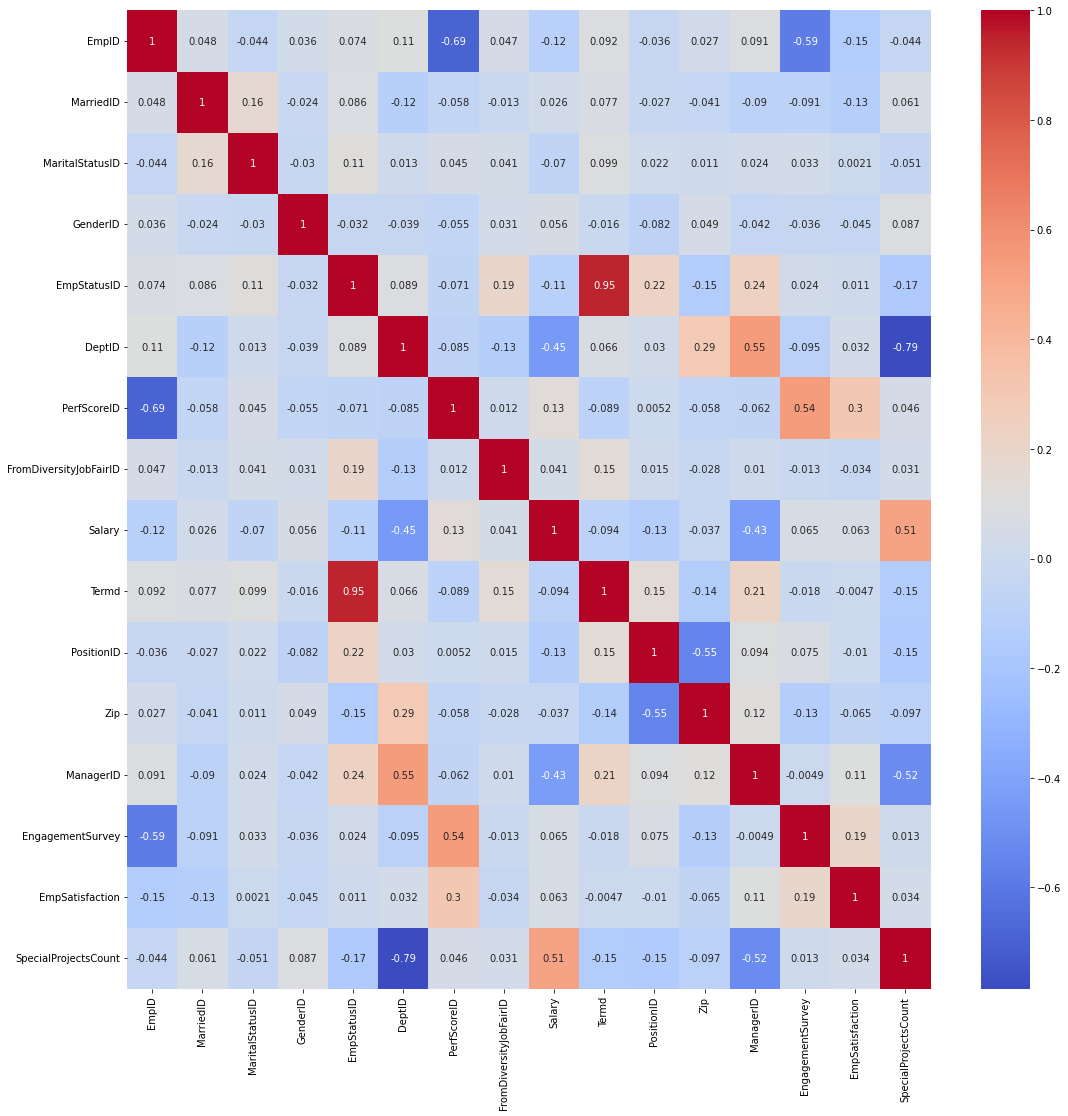

In [11]:
corr = hr_data.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr,cmap='coolwarm',annot=True)
plt.show()

###### Univariate Analysis

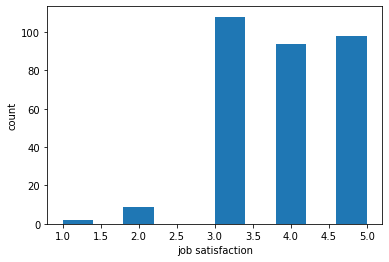

In [12]:
plt.hist(hr_data['EmpSatisfaction'])
plt.xlabel("job satisfaction")
plt.ylabel("count")
plt.show()

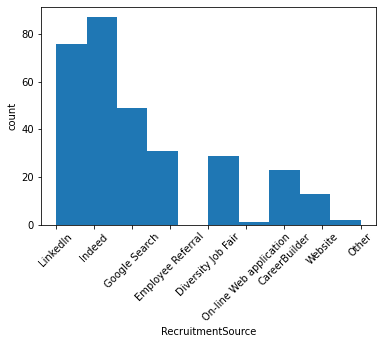

In [13]:
plt.hist(hr_data['RecruitmentSource'])
plt.xlabel("RecruitmentSource")
plt.ylabel("count")
plt.xticks(rotation=45)
plt.show()

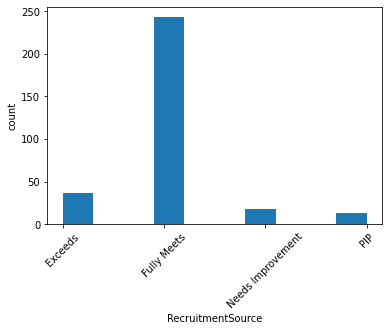

In [14]:
plt.hist(hr_data['PerformanceScore'])
plt.xlabel("RecruitmentSource")
plt.ylabel("count")
plt.xticks(rotation=45)
plt.show()

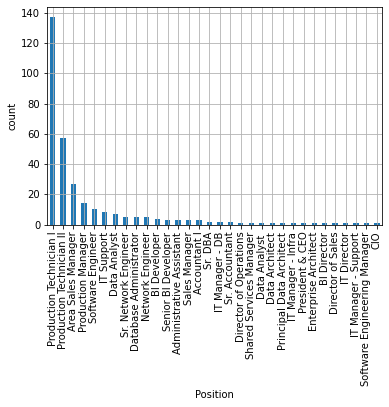

In [15]:
#pie chart showing the job title 
hr_data['Position'].value_counts().plot(kind='bar')
plt.rcParams['figure.figsize']=(10,10)
plt.xlabel("Position")
plt.ylabel("count")
plt.grid()
plt.show()

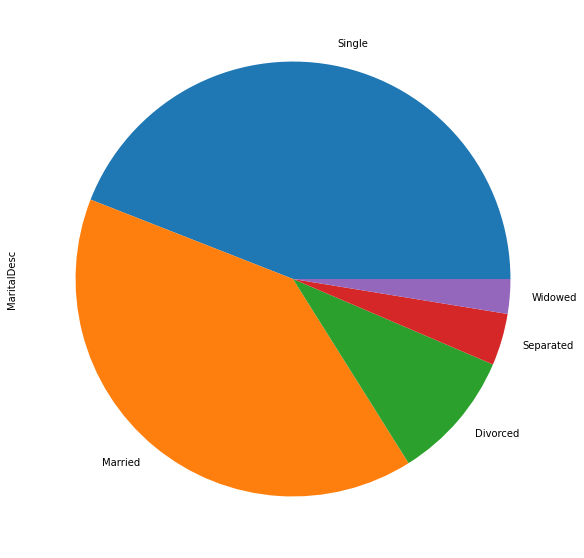

In [16]:
#pie chart showing the job title 
hr_data['MaritalDesc'].value_counts().plot(kind='pie')
plt.rcParams['figure.figsize']=(7,7)
plt.show()

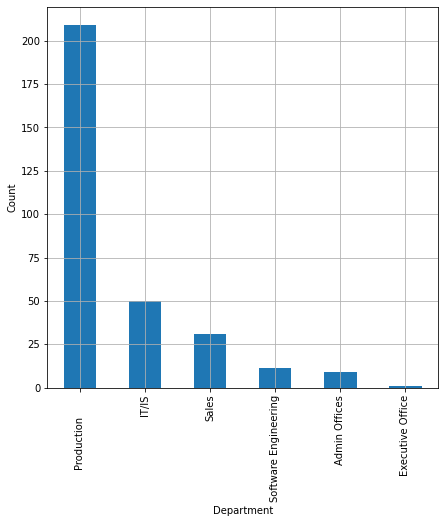

In [17]:
#pie chart showing the Department
hr_data['Department'].value_counts().plot(kind='bar')
plt.rcParams['figure.figsize']=(5,5)
plt.xlabel("Department")
plt.ylabel("Count")
plt.grid()
plt.show()

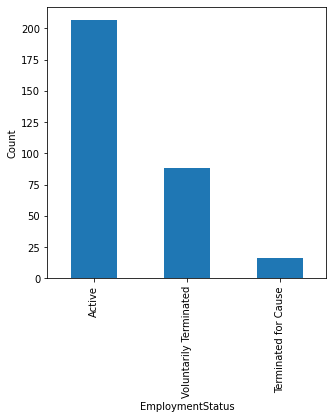

In [18]:
#pie chart showing the Employment status
hr_data['EmploymentStatus'].value_counts().plot(kind='bar')
plt.rcParams['figure.figsize']=(5,5)
plt.xlabel("EmploymentStatus")
plt.ylabel("Count")
plt.show()

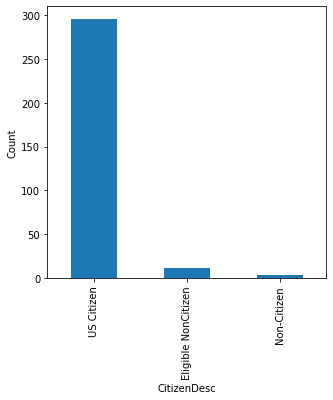

In [19]:

#pie chart showing the Employment status
hr_data['CitizenDesc'].value_counts().plot(kind='bar')
plt.rcParams['figure.figsize']=(5,5)
plt.xlabel("CitizenDesc")
plt.ylabel("Count")
plt.show()

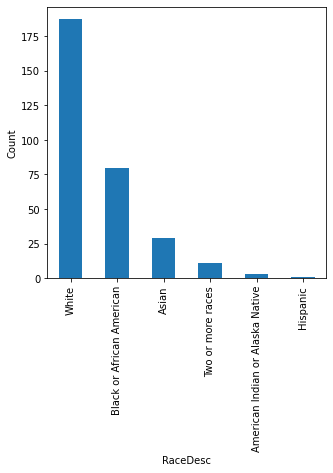

In [20]:

#pie chart showing the Employment status
hr_data['RaceDesc'].value_counts().plot(kind='bar')
plt.rcParams['figure.figsize']=(7,7)
plt.xlabel("RaceDesc")
plt.ylabel("Count")
plt.show()

In [21]:
hr_data.nunique()

Employee_Name                 311
EmpID                         311
MarriedID                       2
MaritalStatusID                 5
GenderID                        2
EmpStatusID                     5
DeptID                          6
PerfScoreID                     4
FromDiversityJobFairID          2
Salary                        308
Termd                           2
PositionID                     30
Position                       32
State                          28
Zip                           158
DOB                           307
MaritalDesc                     5
CitizenDesc                     3
HispanicLatino                  4
RaceDesc                        6
DateofHire                    101
EmploymentStatus                3
Department                      6
ManagerName                    21
ManagerID                      23
RecruitmentSource               9
PerformanceScore                4
EngagementSurvey              119
EmpSatisfaction                 5
SpecialProject

###### Perform Bivariate Analysis

<AxesSubplot:xlabel='PerformanceScore', ylabel='Salary'>

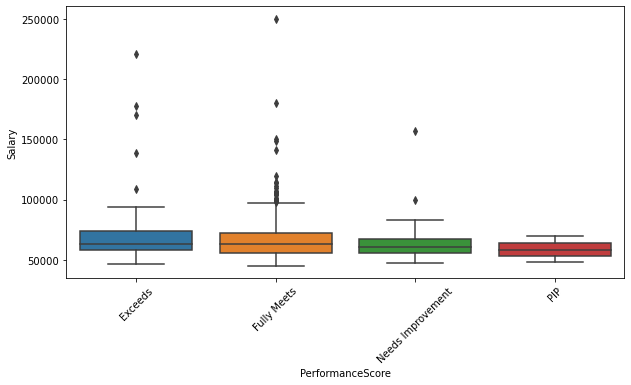

In [22]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.boxplot(y= "Salary",x = "PerformanceScore", data=hr_data)

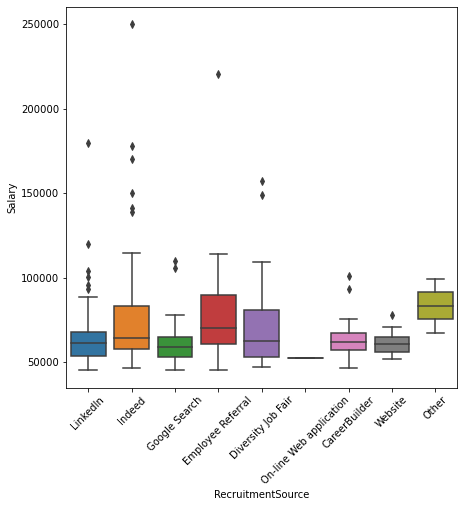

In [23]:
sns.boxplot(y= "Salary",x = "RecruitmentSource", data=hr_data)
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Department')

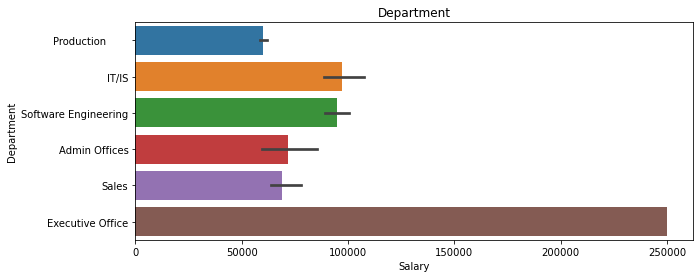

In [24]:
plt.figure(figsize=(10,4)) 
sns.barplot(x='Salary',y='Department',data=hr_data)
plt.title("Department")

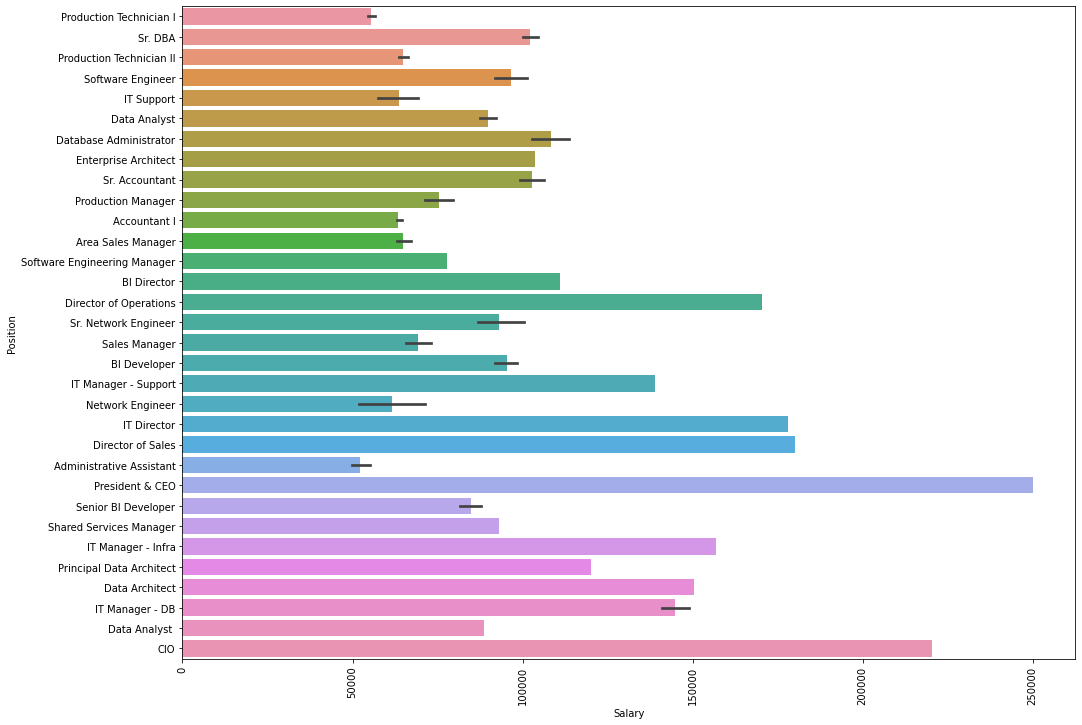

In [25]:
plt.figure(figsize=(16,12)) 
sns.barplot(x='Salary',y='Position',data=hr_data)
plt.xticks(rotation=90)
plt.show()

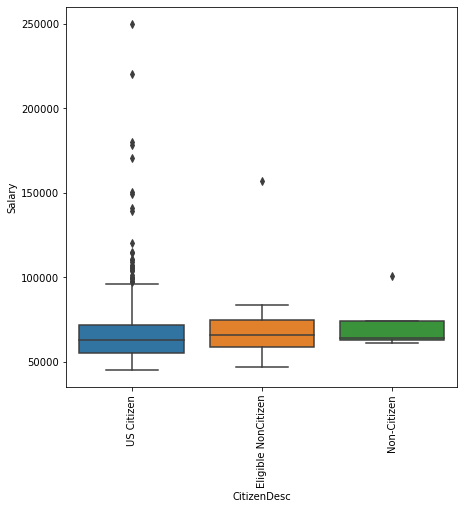

In [26]:
sns.boxplot(y= "Salary",x = "CitizenDesc", data=hr_data)
plt.xticks(rotation=90)
plt.show()

In [27]:
labencoder = preprocessing.LabelEncoder()
to_be_columns=hr_data.select_dtypes(include=['object']).columns
print(to_be_columns)

Index(['Employee_Name', 'Position', 'State', 'DOB', 'MaritalDesc',
       'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire',
       'EmploymentStatus', 'Department', 'ManagerName', 'RecruitmentSource',
       'PerformanceScore', 'LastPerformanceReview_Date'],
      dtype='object')


In [28]:
label_encode = ['Employee_Name','DOB','MaritalDesc',
       'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire','ManagerName',
                'Position', 'State','LastPerformanceReview_Date','EngagementSurvey','RecruitmentSource']
for i in label_encode:
    hr_data[i]= labencoder.fit_transform(hr_data[i])   
hr_data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date
0,0,10026,0,0,1,1,5,4,0,62506,...,Active,Production,17,22.0,5,Exceeds,98,5,0,86
1,1,10084,1,1,1,5,3,3,0,104437,...,Voluntarily Terminated,IT/IS,19,4.0,4,Fully Meets,117,3,6,119
2,2,10196,1,1,0,5,5,3,0,64955,...,Voluntarily Terminated,Production,15,20.0,5,Fully Meets,19,3,0,132
3,3,10088,1,1,0,1,5,3,0,64991,...,Active,Production,8,16.0,4,Fully Meets,113,5,0,2
4,4,10069,0,2,0,5,5,3,0,50825,...,Voluntarily Terminated,Production,20,39.0,3,Fully Meets,118,4,0,17


In [29]:
print(hr_data['EmploymentStatus'].unique())

['Active' 'Voluntarily Terminated' 'Terminated for Cause']


In [30]:
print(hr_data['Department'].unique())

['Production       ' 'IT/IS' 'Software Engineering' 'Admin Offices'
 'Sales' 'Executive Office']


In [31]:
print(hr_data['PerformanceScore'].unique())

['Exceeds' 'Fully Meets' 'Needs Improvement' 'PIP']


In [32]:
columns_to_be_encoded = ['EmploymentStatus','Department','PerformanceScore',]
    
emp_stat= pd.get_dummies(hr_data['EmploymentStatus'])
emp_stat.rename(columns={'Active':'status_active','Voluntarily Terminated':'status_terminated_v','Terminated for Cause':'status_terminated_c'},inplace=True)

dept= pd.get_dummies(hr_data['Department'])
dept.rename(columns={'Production':'Production','IT/IS':'IT/IS','Software Engineering':'Software Engineering','Admin Offices':'Admin Offices','Sales':'Sales','Executive Office':'Executive Office'},inplace=True)

pscore=pd.get_dummies(hr_data['PerformanceScore'])
pscore.rename(columns={'Exceeds':'pscore_Exceeds','Fully Meets':'pscore_Fully', 'Needs Improvement':'pscore_Improvement', 'PIP':'pscore_PIP'})


hr_data=pd.concat([hr_data,emp_stat,dept,pscore],axis=1)
hr_data.drop(['EmploymentStatus','Department','PerformanceScore'],axis=1,inplace=True)

hr_data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,Admin Offices,Executive Office,IT/IS,Production,Sales,Software Engineering,Exceeds,Fully Meets,Needs Improvement,PIP
0,0,10026,0,0,1,1,5,4,0,62506,...,0,0,0,1,0,0,1,0,0,0
1,1,10084,1,1,1,5,3,3,0,104437,...,0,0,1,0,0,0,0,1,0,0
2,2,10196,1,1,0,5,5,3,0,64955,...,0,0,0,1,0,0,0,1,0,0
3,3,10088,1,1,0,1,5,3,0,64991,...,0,0,0,1,0,0,0,1,0,0
4,4,10069,0,2,0,5,5,3,0,50825,...,0,0,0,1,0,0,0,1,0,0


In [35]:
hr_data.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'status_active', 'status_terminated_c',
       'status_terminated_v', 'Admin Offices', 'Executive Office', 'IT/IS',
       'Production       ', 'Sales', 'Software Engineering', 'Exceeds',
       'Fully Meets', 'Needs Improvement', 'PIP'],
      dtype='object')

In [ ]:
hr_data.to_csv("salary.csv",index=False)

In [36]:
X=hr_data.drop(['Salary'],axis=1)

scale=preprocessing.StandardScaler()
for column in X.columns:
    get_column = X[column]
    reshaped_vals = get_column.values.reshape(-1, 1)
    X[column] = scale.fit_transform(reshaped_vals)
    
X

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Termd,...,Admin Offices,Executive Office,IT/IS,Production,Sales,Software Engineering,Exceeds,Fully Meets,Needs Improvement,PIP
0,-1.726490,-1.448024,-0.814311,-0.860434,1.141798,-0.777162,0.359667,1.744516,-0.320682,-0.708813,...,-0.172631,-0.056796,-0.437688,0.698597,-0.332738,-0.191485,2.721287,-1.890378,-0.247858,-0.208864
1,-1.715352,-0.801983,1.228033,0.201451,1.141798,1.455609,-1.489199,0.038401,-0.320682,1.410810,...,-0.172631,-0.056796,2.284732,-1.431440,-0.332738,-0.191485,-0.367473,0.528995,-0.247858,-0.208864
2,-1.704213,0.445546,1.228033,0.201451,-0.875811,1.455609,0.359667,0.038401,-0.320682,1.410810,...,-0.172631,-0.056796,-0.437688,0.698597,-0.332738,-0.191485,-0.367473,0.528995,-0.247858,-0.208864
3,-1.693074,-0.757428,1.228033,0.201451,-0.875811,-0.777162,0.359667,0.038401,-0.320682,-0.708813,...,-0.172631,-0.056796,-0.437688,0.698597,-0.332738,-0.191485,-0.367473,0.528995,-0.247858,-0.208864
4,-1.681936,-0.969062,-0.814311,1.263336,-0.875811,1.455609,0.359667,0.038401,-0.320682,1.410810,...,-0.172631,-0.056796,-0.437688,0.698597,-0.332738,-0.191485,-0.367473,0.528995,-0.247858,-0.208864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,1.681936,-0.233912,-0.814311,-0.860434,1.141798,-0.777162,0.359667,0.038401,-0.320682,-0.708813,...,-0.172631,-0.056796,-0.437688,0.698597,-0.332738,-0.191485,-0.367473,0.528995,-0.247858,-0.208864
307,1.693074,1.615104,-0.814311,-0.860434,-0.875811,1.455609,0.359667,-3.373829,-0.320682,1.410810,...,-0.172631,-0.056796,-0.437688,0.698597,-0.332738,-0.191485,-0.367473,-1.890378,-0.247858,4.787805
308,1.704213,-1.626243,-0.814311,-0.860434,-0.875811,-0.777162,-1.489199,1.744516,-0.320682,-0.708813,...,-0.172631,-0.056796,2.284732,-1.431440,-0.332738,-0.191485,2.721287,-1.890378,-0.247858,-0.208864
309,1.715352,-1.258667,-0.814311,-0.860434,-0.875811,-0.777162,-1.489199,0.038401,-0.320682,-0.708813,...,-0.172631,-0.056796,2.284732,-1.431440,-0.332738,-0.191485,-0.367473,0.528995,-0.247858,-0.208864


In [37]:
minmaxscale=preprocessing.MinMaxScaler()
for column in X.columns:
    get_column = X[column]
    reshaped_vals = get_column.values.reshape(-1, 1)
    X[column] = minmaxscale.fit_transform(reshaped_vals)
    
X

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Termd,...,Admin Offices,Executive Office,IT/IS,Production,Sales,Software Engineering,Exceeds,Fully Meets,Needs Improvement,PIP
0,0.000000,0.080645,0.0,0.00,1.0,0.0,0.8,1.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.003226,0.267742,1.0,0.25,1.0,1.0,0.4,0.666667,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.006452,0.629032,1.0,0.25,0.0,1.0,0.8,0.666667,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.009677,0.280645,1.0,0.25,0.0,0.0,0.8,0.666667,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.012903,0.219355,0.0,0.50,0.0,1.0,0.8,0.666667,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0.987097,0.432258,0.0,0.00,1.0,0.0,0.8,0.666667,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
307,0.990323,0.967742,0.0,0.00,0.0,1.0,0.8,0.000000,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
308,0.993548,0.029032,0.0,0.00,0.0,0.0,0.4,1.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
309,0.996774,0.135484,0.0,0.00,0.0,0.0,0.4,0.666667,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [38]:
y=hr_data['Salary']


In [39]:
from sklearn.model_selection import train_test_split
#Split the Data into Training and Testing sets with test size as 30%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(217, 40) (94, 40) (217,) (94,)


In [60]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, RANSACRegressor, LogisticRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [63]:
from sklearn import metrics
from sklearn.metrics import accuracy_score ,explained_variance_score ,mean_absolute_error , r2_score , classification_report
from sklearn.metrics import precision_recall_fscore_support as score

In [64]:
regressors = [
    LinearRegression(), 
    RANSACRegressor(), 
    KNeighborsRegressor(n_neighbors=9, metric='manhattan'),
    SVR(kernel='linear'),
    Lasso(),
    Ridge(),
    DecisionTreeRegressor(max_depth=5),
    DecisionTreeRegressor(max_depth=10),
    DecisionTreeRegressor(max_depth=20),
    RandomForestRegressor(max_depth=10),
    GaussianProcessRegressor()
]

In [66]:
head = 10
for model in regressors[:head]:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)  
    print(model)
    print("\tExplained variance:", explained_variance_score(y_test, predictions))
    print("\tR2 score:", r2_score(y_test, predictions))
    print('\tTraining Accuracy: ', model.score(X_train, y_train))
    print('\tTesting Accuracy: ', model.score(X_test, y_test))
    print()

LinearRegression()
	Explained variance: 0.230938651239191
	R2 score: 0.22965986673439398
	Training Accuracy:  0.6284597608853862
	Testing Accuracy:  0.22965986673439398

RANSACRegressor()
	Explained variance: 0.1867477902864313
	R2 score: 0.1834840487401721
	Training Accuracy:  0.27037292796646073
	Testing Accuracy:  0.1834840487401721

KNeighborsRegressor(metric='manhattan', n_neighbors=9)
	Explained variance: 0.4393989168147032
	R2 score: 0.41542052934855833
	Training Accuracy:  0.3618912088560471
	Testing Accuracy:  0.41542052934855833

SVR(kernel='linear')
	Explained variance: 0.002127717560809095
	R2 score: -0.08213578209273531
	Training Accuracy:  -0.057883666746380236
	Testing Accuracy:  -0.08213578209273531

Lasso()
	Explained variance: 0.24323974997913655
	R2 score: 0.2420773591912596
	Training Accuracy:  0.6284242544562211
	Testing Accuracy:  0.2420773591912596

Ridge()
	Explained variance: 0.4175331204776018
	R2 score: 0.41753305376855643
	Training Accuracy:  0.5617451097585

In [67]:
# Fine tuning the hyper parameters of the model
rf1=RandomForestRegressor(n_estimators = 100, oob_score = True,n_jobs = 1,random_state =42)  
rf1.fit(X_train,y_train)
y_pred=rf1.predict(X_test)
print('Training Accuracy: ', rf1.score(X_train, y_train))
print('Testing Accuracy: ', rf1.score(X_test, y_test))

Training Accuracy:  0.9176750687199163
Testing Accuracy:  0.5859374289769202


In [68]:
clf=LogisticRegression().fit(X_train,y_train)
pred=clf.predict(X_test)

In [69]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       45046       0.00      0.00      0.00       0.0
       45069       0.00      0.00      0.00       1.0
       45998       0.00      0.00      0.00       0.0
       46120       0.00      0.00      0.00       0.0
       46428       0.00      0.00      0.00       1.0
       46430       0.00      0.00      0.00       1.0
       46654       0.00      0.00      0.00       0.0
       46664       0.00      0.00      0.00       0.0
       46799       0.00      0.00      0.00       1.0
       46998       0.00      0.00      0.00       1.0
       47414       0.00      0.00      0.00       1.0
       47837       0.00      0.00      0.00       0.0
       48413       0.00      0.00      0.00       1.0
       49256       0.00      0.00      0.00       0.0
       50178       0.00      0.00      0.00       1.0
       50274       0.00      0.00      0.00       1.0
       50470       0.00      0.00      0.00       1.0
       50482       0.00    